In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import stats as stats
import seaborn as sns

In [16]:
def read_data(filename):
    
    df = pd.read_csv(filename,skiprows=[43,44,45,46,47,48],na_values=[".."],index_col=['Country Name', 'Series Name'])

    df_years = df.dropna(axis=1)
    df_years = df_years.drop(df_years.columns[0] ,axis=1)
    
    df_countries = pd.DataFrame.transpose(df_years)
  
    df_years = df_years.astype('float64')
    return  df_years, df_countries

In [17]:
filename = "b6224e18-a134-4383-9cd7-1a0ce8b28a0a_Data.csv"  
df_years, df_countries = read_data(filename)

In [18]:
print('dataframes with years as columns:\n',df_years)

dataframes with years as columns:
                                                                                1992  \
Country Name       Series Name                                                        
Pakistan           Arable land (% of land area)                        3.881279e+01   
United States      Arable land (% of land area)                        2.009835e+01   
United Kingdom     Arable land (% of land area)                        2.709048e+01   
Japan              Arable land (% of land area)                        1.292924e+01   
China              Arable land (% of land area)                        1.309083e+01   
Russian Federation Arable land (% of land area)                        8.054204e+00   
Nigeria            Arable land (% of land area)                        3.304896e+01   
Pakistan           Forest area (% of land area)                        6.345584e+00   
United States      Forest area (% of land area)                        3.304602e+01   
United K

In [19]:
print('dataframes with countries as columns:\n',df_countries)

dataframes with countries as columns:
 Country Name                     Pakistan                United States  \
Series Name  Arable land (% of land area) Arable land (% of land area)   
1992                            38.812785                    20.098352   
1993                            39.214923                    19.952920   
1994                            39.240868                    19.864592   
1995                            39.513284                    19.853673   
1996                            39.630033                    19.544359   
1997                            40.265670                    19.389974   
1998                            40.369448                    19.301536   
1999                            40.356476                    19.147152   
2000                            40.265670                    19.140966   
2001                            40.602947                    19.144459   
2002                            40.499170                    18.879995   

In [20]:
print(df_years.describe())

               1992          1993          1994          1995          1996  \
count  4.200000e+01  4.200000e+01  4.200000e+01  4.200000e+01  4.200000e+01   
mean   2.007380e+07  2.057917e+07  2.109705e+07  2.162433e+07  2.215975e+07   
std    6.143189e+07  6.348790e+07  6.560561e+07  6.777763e+07  7.000602e+07   
min    5.473152e-01  5.874280e-01  5.899920e-01  6.215352e-01  6.253596e-01   
25%    1.454425e+01  1.403346e+01  1.403841e+01  1.400184e+01  1.403549e+01   
50%    5.549544e+01  5.721481e+01  5.566323e+01  5.623058e+01  5.907511e+01   
75%    4.240468e+03  4.284651e+03  4.072937e+03  4.018735e+03  3.967603e+03   
max    3.285215e+08  3.429614e+08  3.578365e+08  3.730352e+08  3.885933e+08   

               1997          1998          1999          2000          2001  \
count  4.200000e+01  4.200000e+01  4.200000e+01  4.200000e+01  4.200000e+01   
mean   2.270734e+07  2.326228e+07  2.381425e+07  2.436735e+07  2.501791e+07   
std    7.229978e+07  7.463604e+07  7.698480e+07  7.

In [130]:

print(df_years.median())

1992    55.495443
1993    57.214810
1994    55.663228
1995    56.230583
1996    59.075114
1997    59.116669
1998    58.003205
1999    59.474517
2000    59.903480
2001    60.401787
2002    61.577842
2003    63.793959
2004    63.675689
2005    62.882163
2006    63.160055
2007    65.478349
2008    66.201247
2009    64.290231
2010    62.321671
2011    65.959778
2012    65.853662
2013    64.347842
2014    62.220652
dtype: float64


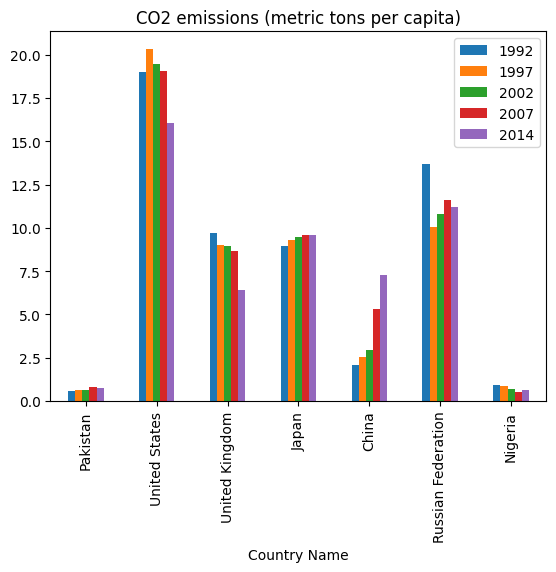

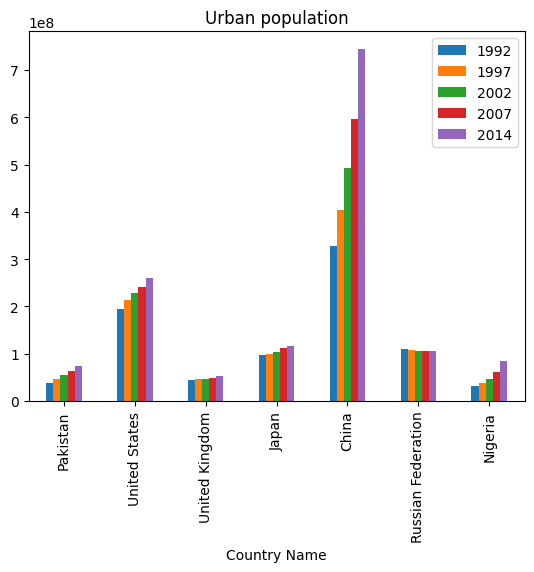

In [131]:
def bar_plot(dataframe):
       df_5yearsgap= dataframe[['1992', '1997', '2002', '2007', '2014']]
       df_bar = df_5yearsgap.reset_index('Series Name')
       df_bar[(df_bar['Series Name'] == 'CO2 emissions (metric tons per capita)')].plot.bar()
       plt.title('CO2 emissions (metric tons per capita)')
       df_bar[(df_bar['Series Name'] == 'Urban population')].plot.bar()
       plt.title('Urban population')

bar_plot(df_years)

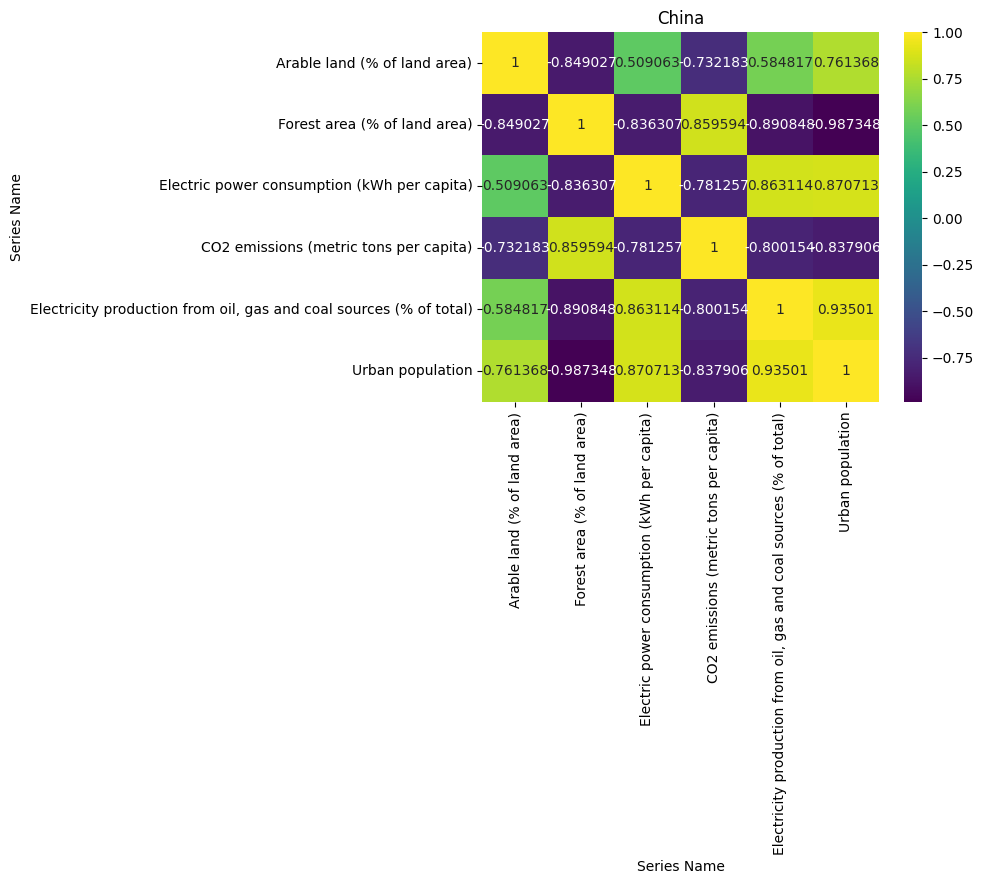

In [132]:
def heat_map(dataframe):
    df_yearrset = dataframe.reset_index('Country Name')
    country_data = (df_yearrset.loc[(df_yearrset['Country Name'] == 'China')]).iloc[:,1:].T.corr()
    sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')
    plt.title('China')


heat_map(df_years)

Text(0.5, 1.0, 'China')

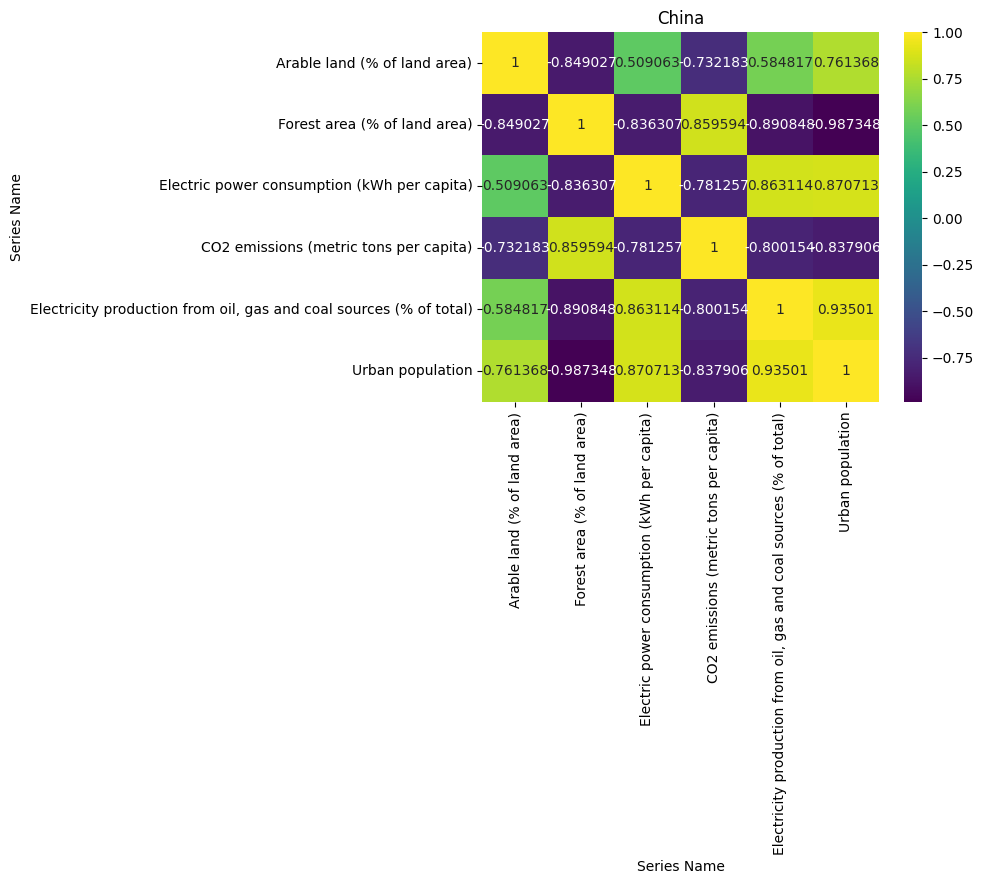

In [133]:

df_yearrset1 = df_years.reset_index('Country Name')
country_data = df_yearrset1.loc[(df_yearrset['Country Name'] == 'Nigeria')]
country_data =country_data.iloc[:,1:]
heatmap_data = country_data.T.corr()
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')
plt.title('China')



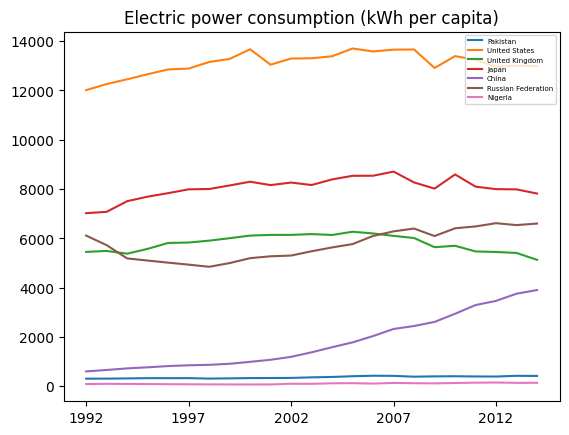

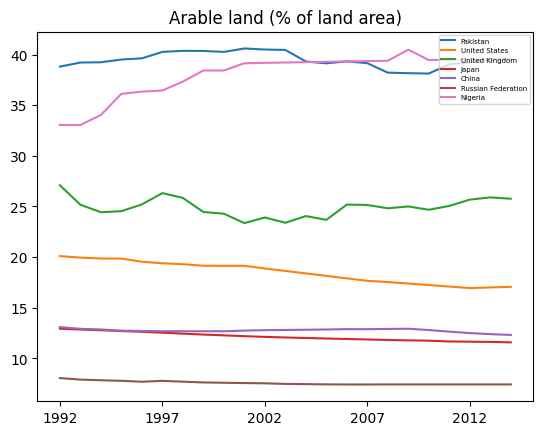

In [134]:
def line_plot(dataframe):
    df_yearrset2 = dataframe.reset_index('Series Name')
    df_yearrset2[(df_yearrset2['Series Name'] == 'Electric power consumption (kWh per capita)')].iloc[:,1:].T.plot.line()
    plt.legend(loc='upper right', fontsize=5)
    plt.title('Electric power consumption (kWh per capita)')

    df_yearrset2[(df_yearrset2['Series Name'] == 'Arable land (% of land area)')].iloc[:,1:].T.plot.line()
    plt.legend(loc='upper right', fontsize=5)
    plt.title('Arable land (% of land area)')

line_plot(df_years)